In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

from sklearn.model_selection import train_test_split

2025-05-08 16:18:59.415417: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 16:18:59.430779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746710339.445428    7800 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746710339.449419    7800 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746710339.462045    7800 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
df = pd.read_csv("MetroPT3(AirCompressor).csv", parse_dates = True)

In [3]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
df.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516947,2020-09-01 03:59:50,-0.014,8.860,8.848,-0.022,8.864,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
failures = [
    ("2020-04-18 00:00", "2020-04-18 23:59"),
    ("2020-05-29 23:30", "2020-05-30 06:00"),
    ("2020-06-05 10:00", "2020-06-07 14:30"),
    ("2020-07-15 14:30", "2020-07-15 19:00"),
]
failures_datetime = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in failures]

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00
mean,1.37,8.98,7.57,0.06,8.99,62.64,2.05,0.84,0.16,0.92,0.83,0.00,0.99,0.90,0.94
std,3.25,0.64,3.33,0.38,0.64,6.52,2.30,0.37,0.37,0.27,0.37,0.06,0.09,0.29,0.24
min,-0.03,0.73,-0.04,-0.03,0.71,15.40,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.01,8.49,8.25,-0.02,8.49,57.78,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
50%,-0.01,8.96,8.78,-0.02,8.96,62.70,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
75%,-0.01,9.49,9.37,-0.02,9.49,67.25,3.81,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
max,10.68,10.30,10.29,9.84,10.30,89.05,9.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [6]:
def plot_all_features(df):
    df.plot(subplots=True, figsize=(20, 30))
    plt.suptitle("All features")
    plt.show()

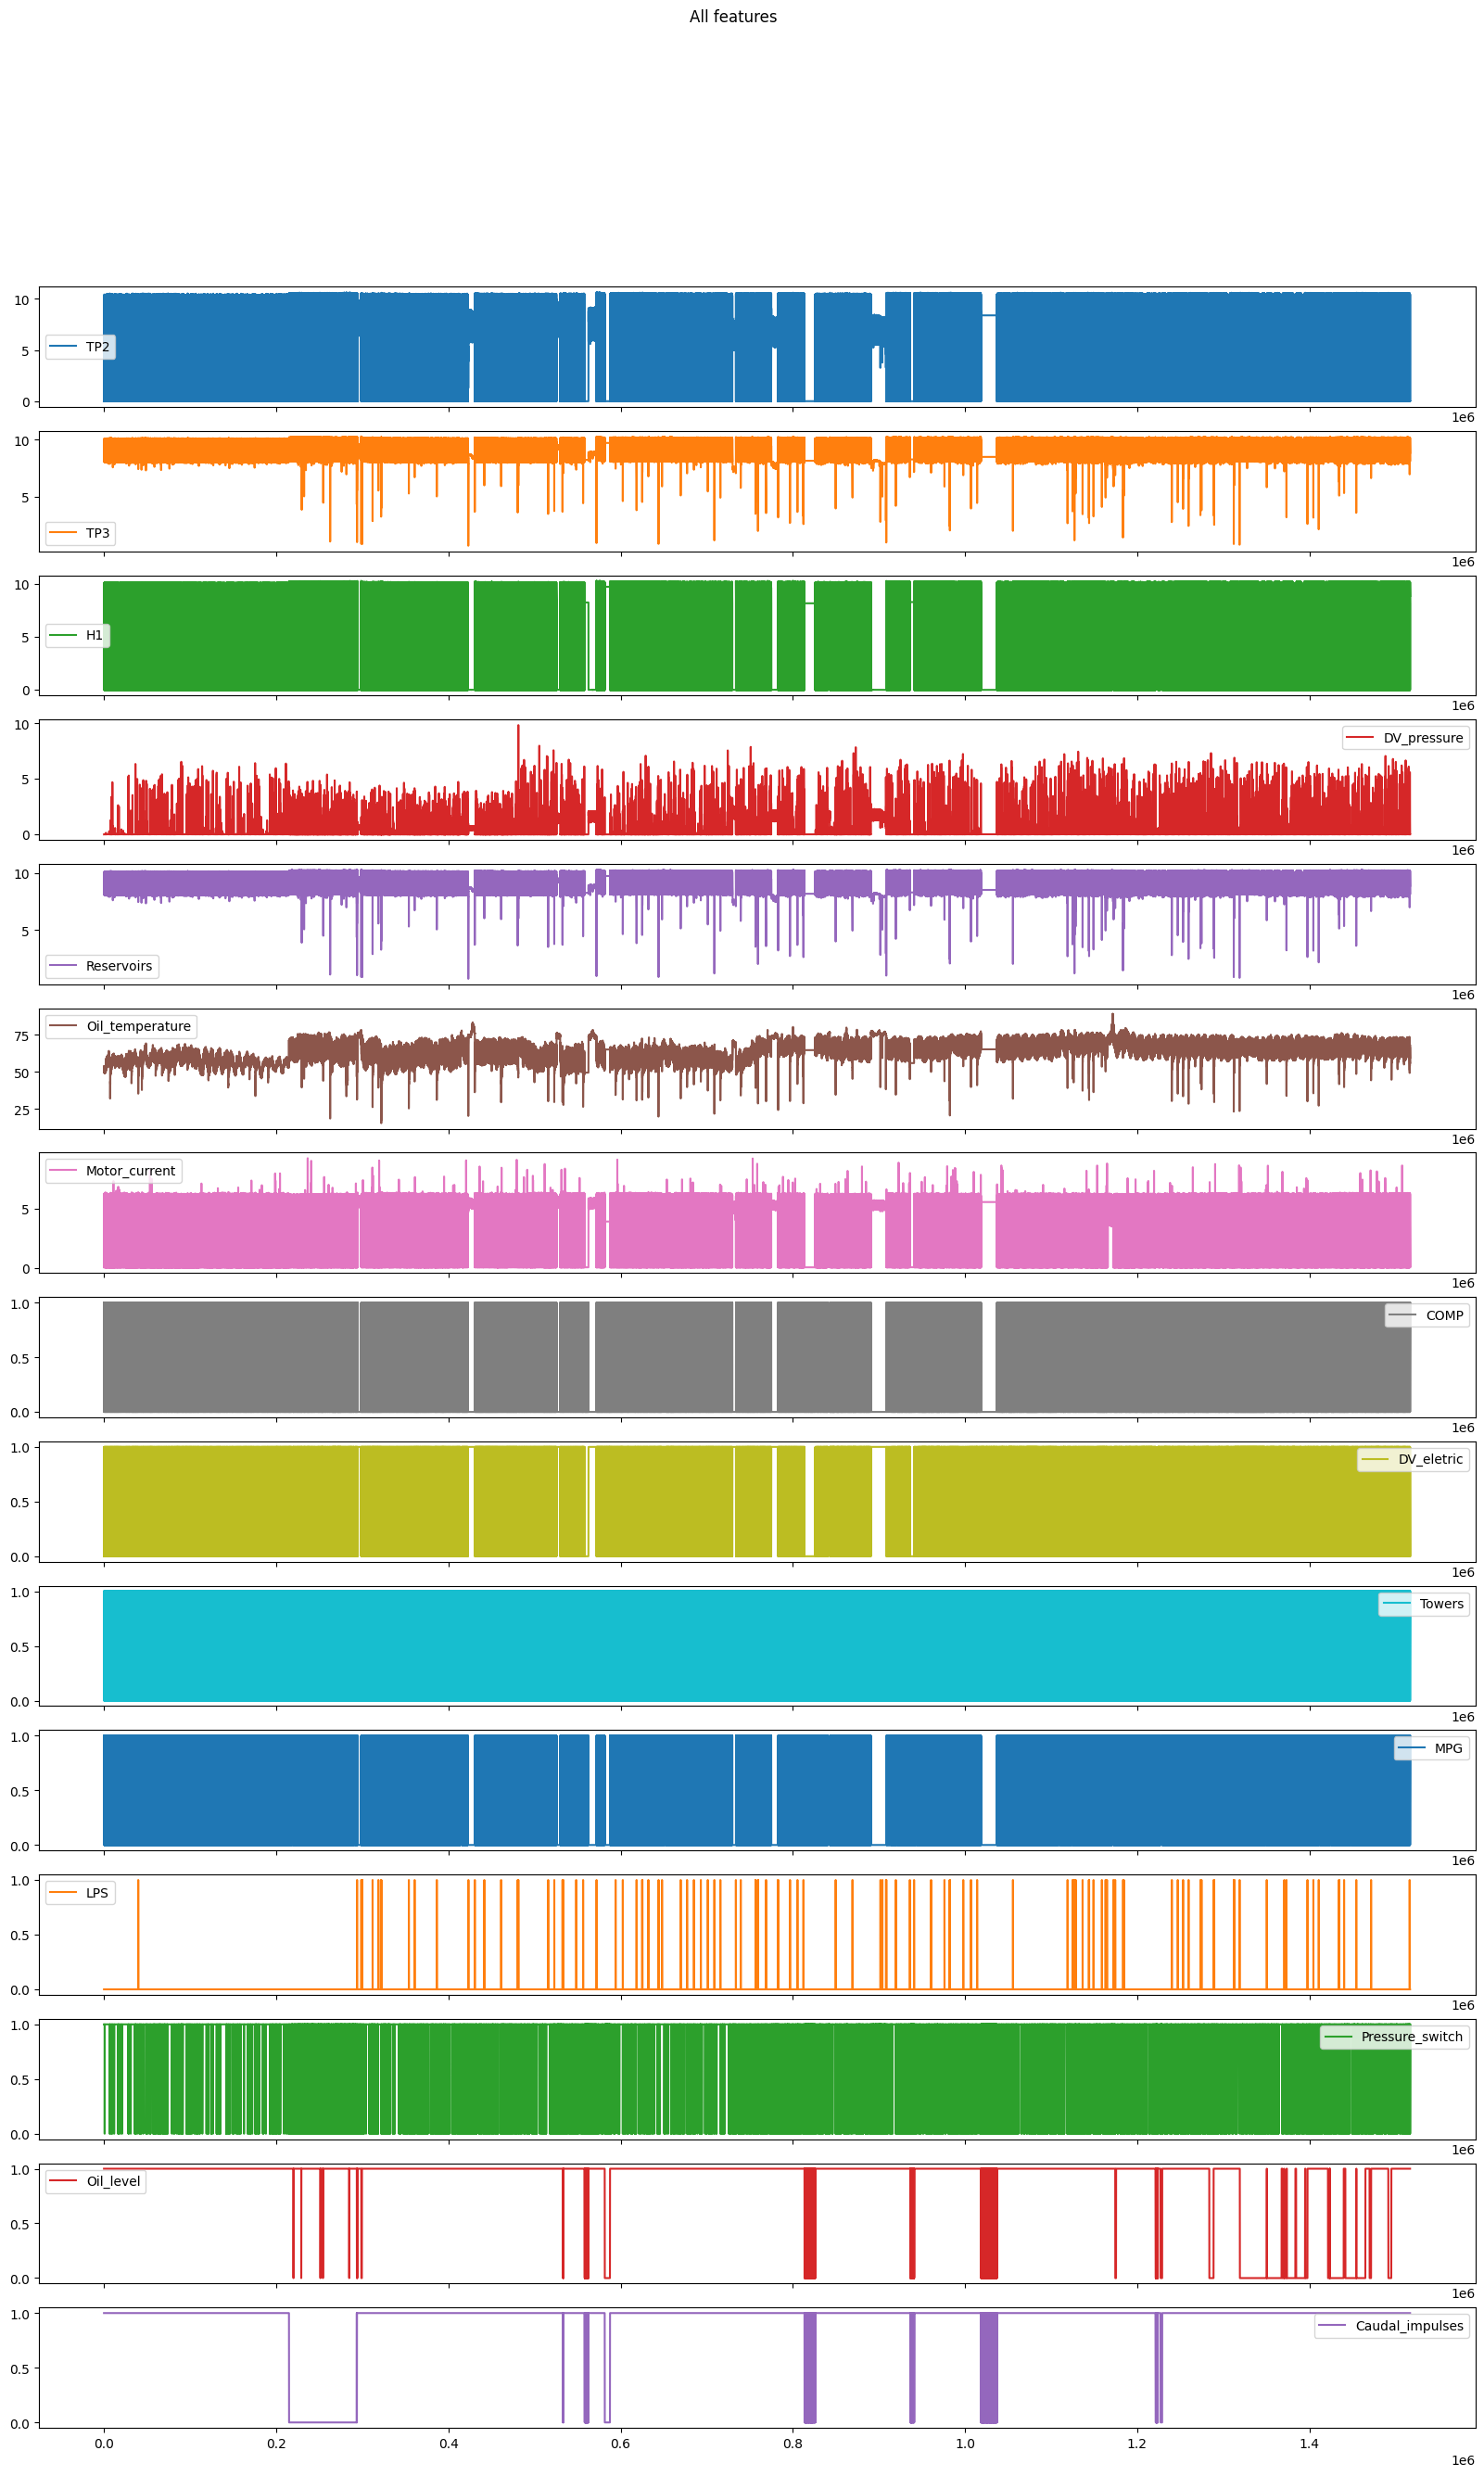

In [9]:
plot_all_features(df)

In [7]:
def plot_correlation_heatmap(df):
    df_numeric = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(14, 12))
    sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Full Dataset Correlation Heatmap")
    plt.show()

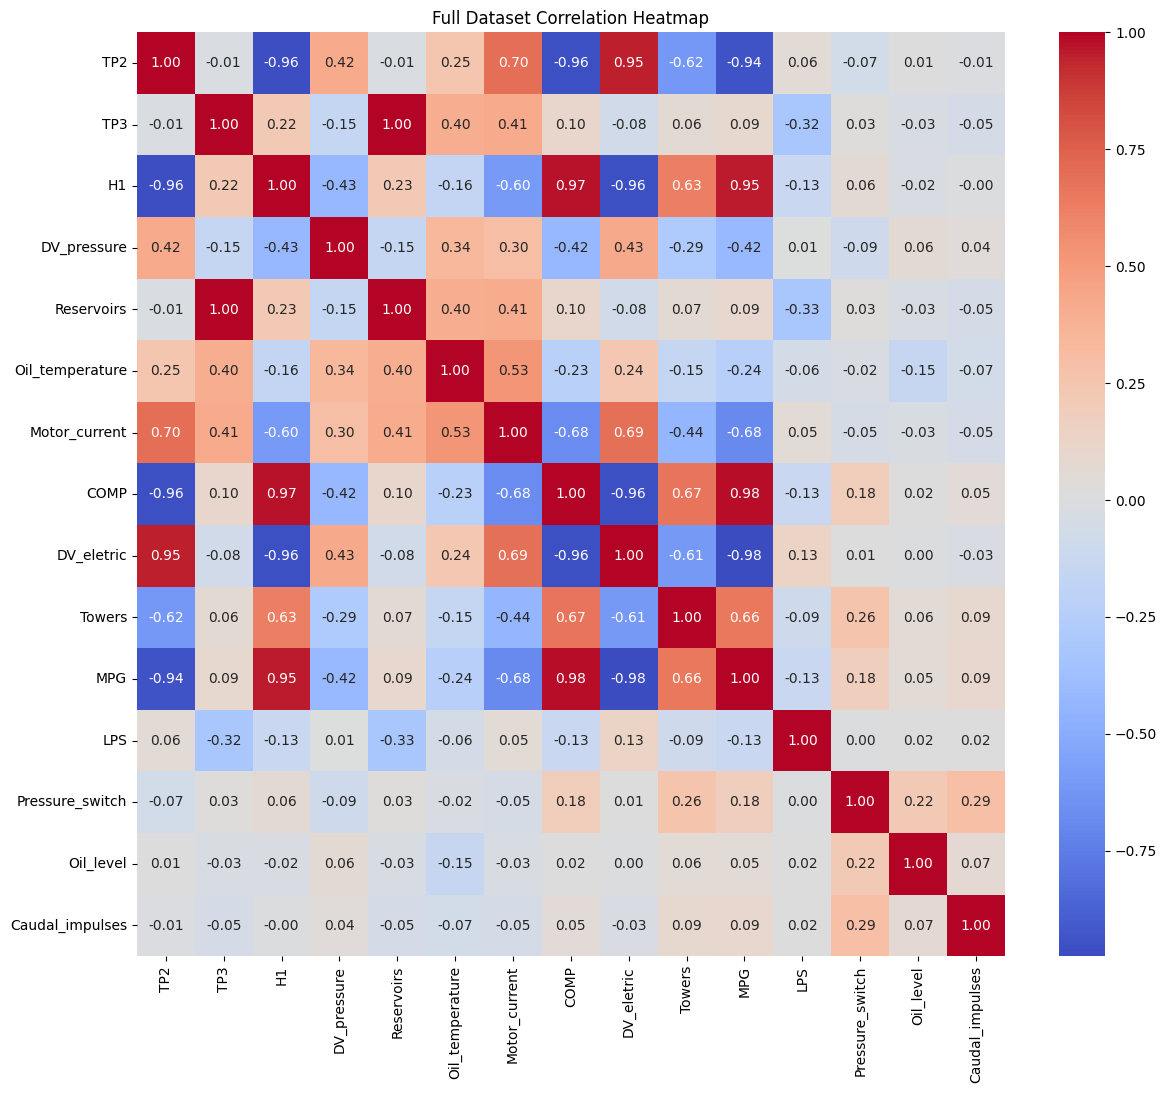

In [8]:
plot_correlation_heatmap(df)

In [ ]:
# H1-TP2 -0.96
# Reservoirs-TP3 1.0
# TP2-COMP -0.96
# COMP-H1 0.97
# DV_eletric-TP2 0.95
# DV_eletric-H1 -0.96
# DV_eletric-COMP -0.96
# MPG-TP2 -0.94
# H1-MPG 0.95
# COMP-MPG 0.98
# DV_eletriC-MPG -0.98

# Reservoirs

In [8]:
df = df.drop(columns = ['Reservoirs', 'TP2', 'H1', "MPG", "COMP", "LPS", "Caudal_impulses"])

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_diff'] = df['timestamp'].diff()

In [10]:
df = df.set_index("timestamp")

In [11]:
df.isna().sum()

TP3                0
DV_pressure        0
Oil_temperature    0
Motor_current      0
DV_eletric         0
Towers             0
Pressure_switch    0
Oil_level          0
time_diff          1
dtype: int64

In [12]:
df.isnull().sum()

TP3                0
DV_pressure        0
Oil_temperature    0
Motor_current      0
DV_eletric         0
Towers             0
Pressure_switch    0
Oil_level          0
time_diff          1
dtype: int64

In [13]:
df['time_diff'] = df.index.to_series().diff().fillna(pd.Timedelta(seconds=0))

In [14]:
df["time_diff"].value_counts().sort_index()[:10]

time_diff
0 days 00:00:00          1
0 days 00:00:08          2
0 days 00:00:09     128277
0 days 00:00:10    1337521
0 days 00:00:11       4471
0 days 00:00:12      38321
0 days 00:00:13       7988
0 days 00:00:14          3
0 days 00:00:15          1
0 days 00:00:17          3
Name: count, dtype: int64

In [15]:
(df['time_diff'] <= pd.Timedelta(seconds=13)).sum()

np.int64(1516581)

In [16]:
df = df.drop(columns="time_diff")

In [17]:
def split_segment(dataframe):
    data_frame = dataframe.copy()
    data_frame.index = pd.to_datetime(data_frame.index)
    time_gaps = data_frame.index.to_series().diff()
    threshold = pd.Timedelta(seconds=13)
    gap_indices = time_gaps > threshold
    segment_id = gap_indices.cumsum()
    data_frame['segment'] = segment_id
    segments = [group.drop(columns='segment') for _, group in data_frame.groupby('segment')]

    return segments

In [18]:
def result_failure_data_range(index):
    failure_start, failure_end = failures[index]
    df_failure = df[failure_start: failure_end]
    N = len(df.loc[failure_start : failure_end])

    if index != (len(failures) - 1):
        df_after_date = df[df.index > pd.to_datetime(failure_end)]
        subset = df_after_date.iloc[:N]
    else:
        df_before_date = df[df.index < pd.to_datetime(failure_start)]
        subset = df_before_date.tail(N)

    return pd.concat([df_failure, subset])

In [19]:
df_test = pd.DataFrame()
for i in range(len(failures)):
    test_df = result_failure_data_range(i)
    df_test = pd.concat([df_test, test_df])

In [20]:
df_test = df_test[~df_test.index.duplicated(keep='first')]

In [21]:
df_normal = df[~df.index.isin(df_test.index)]

In [22]:
training_mean = df_normal.mean()
training_std = df_normal.std()
df_normal = (df_normal - training_mean) / training_std
df_normal = df_normal.astype("float32")

In [23]:
df_test = (df_test - training_mean) / training_std

In [24]:
df_test = df_test.astype("float32")

In [25]:
df_tests = split_segment(df_test)

In [26]:
df_test

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-04-18 00:00:01,-1.188638,-0.156180,-2.042302,-0.852534,-0.408727,0.277302,0.094073,0.332913
2020-04-18 00:00:13,-1.188638,-0.156180,-2.042302,-0.852534,-0.408727,0.277302,0.094073,0.332913
2020-04-18 00:00:24,-1.188638,-0.156180,-2.042302,-0.852534,-0.408727,0.277302,0.094073,0.332913
2020-04-18 00:00:36,-1.188638,-0.156180,-2.042302,-0.852534,-0.408727,-3.606179,-10.630083,-3.003789
2020-04-18 00:00:49,-1.188638,-0.156180,-2.042302,-0.852534,-0.408727,0.277302,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-07-15 14:29:11,0.915206,-0.097628,2.988147,1.700621,2.446620,0.277302,0.094073,0.332913
2020-07-15 14:29:21,0.991248,-0.097628,3.003990,1.763430,2.446620,0.277302,0.094073,0.332913
2020-07-15 14:29:31,1.064122,-0.097628,3.035678,1.762329,2.446620,0.277302,0.094073,0.332913


In [27]:
df_normal

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-02-01 00:00:00,0.569846,-0.156180,-1.384779,-0.852534,-0.408727,0.277302,0.094073,0.332913
2020-02-01 00:00:10,0.554003,-0.148861,-1.372896,-0.852534,-0.408727,0.277302,0.094073,0.332913
2020-02-01 00:00:19,0.538161,-0.148861,-1.384779,-0.851432,-0.408727,0.277302,0.094073,0.332913
2020-02-01 00:00:29,0.522319,-0.148861,-1.412506,-0.852534,-0.408727,0.277302,0.094073,0.332913
2020-02-01 00:00:39,0.506477,-0.148861,-1.404584,-0.852534,-0.408727,0.277302,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-09-01 03:59:10,-0.127211,-0.148861,-0.422260,-0.851432,-0.408727,0.277302,0.094073,0.332913
2020-09-01 03:59:20,-0.149390,-0.141542,-0.434143,-0.850330,-0.408727,0.277302,0.094073,0.332913
2020-09-01 03:59:30,-0.171569,-0.148861,-0.434143,-0.851432,-0.408727,0.277302,0.094073,0.332913


In [28]:
df_normal.dtypes

TP3                float32
DV_pressure        float32
Oil_temperature    float32
Motor_current      float32
DV_eletric         float32
Towers             float32
Pressure_switch    float32
Oil_level          float32
dtype: object

In [29]:
df_test.dtypes

TP3                float32
DV_pressure        float32
Oil_temperature    float32
Motor_current      float32
DV_eletric         float32
Towers             float32
Pressure_switch    float32
Oil_level          float32
dtype: object

In [30]:
def plot_selected_feature_dataframes(selected_feature, dataframes):
    for idx, dataframe in enumerate(dataframes):   
        plt.figure(figsize=(14, 5))
        plt.plot(dataframe.index, dataframe[selected_feature], label=f'dataframe {idx}')
        plt.title(f'dataframe {idx} - {selected_feature}', fontsize=16)
        plt.xlabel('Time', fontsize=14)
        plt.ylabel(selected_feature, fontsize=14)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

In [32]:
TIME_STEPS = 120

def create_sequences(values, time_steps = TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i: (i + time_steps)])
    return np.stack(output)

In [33]:
df_normals = split_segment(df_normal)

In [34]:
TRAIN_SIZE = 150000

In [35]:
length = 0
train_dataframes = []
for dataframe in df_normals:
    train_dataframes.append(dataframe)
    length += dataframe.shape[0]
    if length > TRAIN_SIZE:
        break
df_train = pd.concat(train_dataframes)

In [36]:
x_train = create_sequences(df_train)
print("Training input shape:", x_train.shape)

Training input shape: (168815, 120, 8)


In [37]:
keras.utils.clear_session()

In [38]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [39]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32,
            kernel_size=7,
            padding="same",
            activation="relu",
        ),
        layers.Conv1D(
            filters=16,
            kernel_size=7,
            padding="same",
            activation="relu",
        ),
        layers.Conv1DTranspose(
            filters=16,
            kernel_size=7,
            padding="same",
            activation="relu",
        ),
        layers.Conv1DTranspose(
            filters=32,
            kernel_size=7,
            padding="same",
            activation="relu",
        ),
        layers.Conv1DTranspose(filters=x_train.shape[2], kernel_size=7, padding="same"),
    ]
)

I0000 00:00:1746710381.152223    7800 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 120, 32)        │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 120, 16)        │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose                │ (None, 120, 16)        │         1,808 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_1              │ (None, 120, 32)        │         3,616 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_2              │ (None, 120, 8)         │         1,800 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,648 (49.41 KB)

 Trainable params: 12,648 (49.41 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")

In [42]:
batch_size = 128
epochs = 50

In [43]:
x_train, x_val = train_test_split(x_train, test_size=0.3, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_train))
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, x_val))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [44]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks = [
        early_stop
    ]
)

Epoch 1/50


I0000 00:00:1746710391.830963    7989 service.cc:152] XLA service 0x7f58e400b390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746710391.831005    7989 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-05-08 16:19:51.853352: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746710392.001695    7989 cuda_dnn.cc:529] Loaded cuDNN version 90300


 33/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3693

I0000 00:00:1746710393.723918    7989 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


924/924 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0605 - val_loss: 0.0026
Epoch 2/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0014 - val_loss: 9.4555e-04
Epoch 4/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - val_loss: 7.1802e-04
Epoch 5/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.7986e-04 - val_loss: 5.9706e-04
Epoch 6/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.5215e-04 - val_loss: 4.9277e-04
Epoch 7/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.7452e-04 - val_loss: 4.0606e-04
Epoch 8/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5.0031e-04 - val_loss: 3.5127e-04
Epoch 9/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.3349e-04 - val_loss: 3.5296e-04
Epoch 10/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.1871e-04 - val_loss: 3.0456e-04
Epoch 11/50
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.5947e-04 - val_loss: 2.9162e-

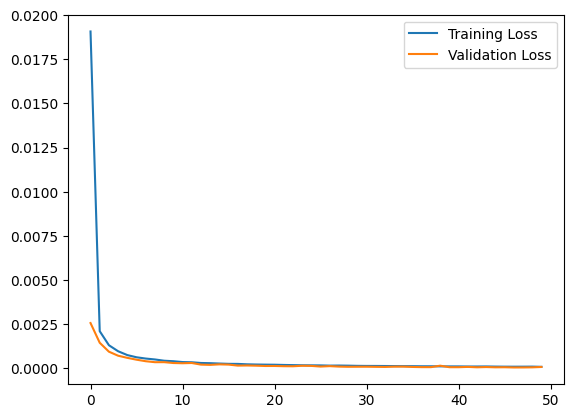

In [45]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [46]:
def plot_mae_loss(mae_loss):
    mae_loss = mae_loss.reshape((-1))
    plt.hist(mae_loss, bins=50)
    plt.xlabel("MAE loss")
    plt.ylabel("No of samples")
    plt.show()

In [47]:
batch_size = 16
x_train_pred = []

for i in range(0, len(x_train), batch_size):
    batch = x_train[i:i+batch_size]
    preds = model.predict_on_batch(batch)
    x_train_pred.append(preds)

x_train_pred = np.concatenate(x_train_pred, axis=0)

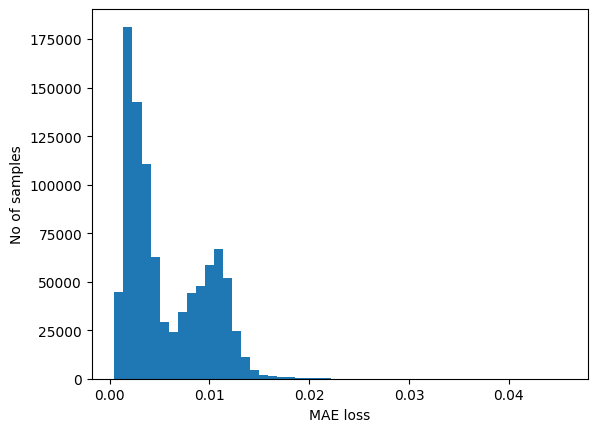

In [48]:
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
plot_mae_loss(train_mae_loss)

In [49]:
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  0.045675166


In [50]:
def plot_selected_features():
    time_steps = x_train[0].shape[0] 
    n_features = x_train[0].shape[1] 
    
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 3 * n_features))

    for i in range(n_features):
        ax = axes[i]
        ax.plot(range(time_steps), x_train[0][:, i], label='Original', linewidth=2)
        ax.plot(range(time_steps), x_train_pred[0][:, i], label='Reconstructed', linestyle='--')
        ax.set_title(f'Feature {df_train.columns[i]}')  
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

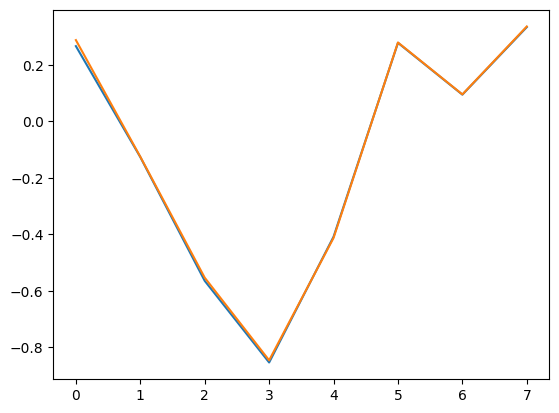

In [51]:
plt.plot(x_train[0][0])
plt.plot(x_train_pred[0][0])
plt.show()

In [52]:
test_sequence_list = []
test_dataframe = pd.DataFrame()
for _df_test in df_tests:
    if len(_df_test.values) >= TIME_STEPS:
        df_test_sequences = create_sequences(_df_test.values)
        test_sequence_list.append(df_test_sequences)
        test_dataframe = pd.concat([test_dataframe, _df_test])

In [53]:
x_test = np.concatenate(test_sequence_list)
print("Test input shape: ", x_test.shape)

Test input shape:  (58262, 120, 8)


In [54]:
batch_size = 16
x_test_pred = []

for i in range(0, len(x_test), batch_size):
    batch = x_test[i:i+batch_size]
    preds = model.predict_on_batch(batch)
    x_test_pred.append(preds)

x_test_pred = np.concatenate(x_test_pred, axis=0)

In [ ]:
#x_test_pred = model.predict(x_test, batch_size=64)

In [55]:
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=(1,2))

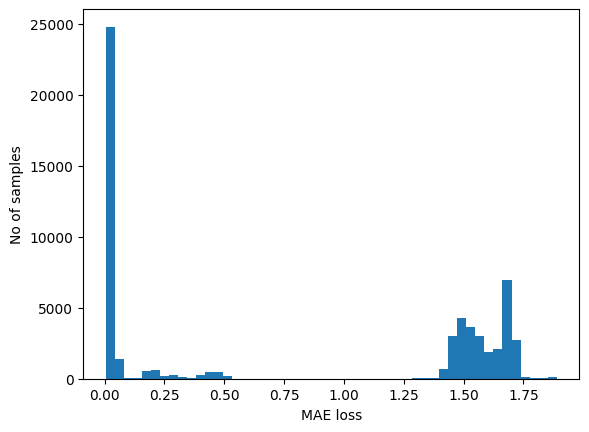

In [56]:
plot_mae_loss(test_mae_loss)

In [57]:
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

Number of anomaly samples:  33113
Indices of anomaly samples:  (array([    0,     1,     2, ..., 58259, 58260, 58261]),)


In [58]:
def detect_anomalous_data_indices():
    anomalous_data_indices = []
    for data_idx in range(TIME_STEPS - 1, len(test_dataframe) - TIME_STEPS + 1):
        if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
            anomalous_data_indices.append(data_idx)
    return anomalous_data_indices

In [59]:
anomalous_data_indices = detect_anomalous_data_indices()

In [60]:
len(anomalous_data_indices)

33099

In [61]:
predicted_timestamps = test_dataframe.index[anomalous_data_indices]
predicted_timestamps.sort_values()

DatetimeIndex(['2020-04-18 00:43:38', '2020-04-18 00:43:48',
               '2020-04-18 00:43:58', '2020-04-18 00:44:08',
               '2020-04-18 00:44:18', '2020-04-18 00:44:28',
               '2020-04-18 00:44:38', '2020-04-18 00:44:48',
               '2020-04-18 00:44:58', '2020-04-18 00:45:07',
               ...
               '2020-07-15 18:59:20', '2020-07-15 18:59:30',
               '2020-07-15 18:59:40', '2020-07-15 18:59:50',
               '2020-07-15 19:00:00', '2020-07-15 19:00:10',
               '2020-07-15 19:00:20', '2020-07-15 19:00:30',
               '2020-07-15 19:00:40', '2020-07-15 19:00:50'],
              dtype='datetime64[ns]', name='timestamp', length=33099, freq=None)

In [62]:
for start, end in failures_datetime:
    print(len(df.loc[start:end]))

8657
2360
17315
1622


In [63]:
def detected_and_test_dataframes(index):
    failure_start, failure_end = failures_datetime[index]
    failure_dataframe = test_dataframe[(test_dataframe.index >= failure_start) &
                                    (test_dataframe.index <= failure_end)]
    filter = (predicted_timestamps >= failure_start) & (predicted_timestamps <= failure_end)
    predicted_dataframe = test_dataframe.loc[predicted_timestamps[filter]]

    return failure_dataframe, predicted_dataframe

In [64]:
failure_0_dataframe, predicted_dataframe = detected_and_test_dataframes(0)

In [65]:
failure_0_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-04-18 00:23:59,-1.309039,6.709011,0.979928,1.631200,2.44662,0.277302,0.094073,0.332913
2020-04-18 00:24:09,-1.239333,6.745606,1.134406,1.645525,2.44662,0.277302,0.094073,0.332913
2020-04-18 00:24:18,-1.182302,6.789520,1.245314,1.655442,2.44662,0.277302,0.094073,0.332913
2020-04-18 00:24:28,-1.172796,4.959778,1.288885,1.435058,2.44662,-3.606179,0.094073,0.332913
2020-04-18 00:24:38,-1.198144,6.730968,1.383948,1.609161,2.44662,-3.606179,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-04-18 23:58:17,-0.187411,7.316485,1.704788,1.660952,2.44662,0.277302,0.094073,0.332913
2020-04-18 23:58:26,-0.165232,7.331123,1.665178,1.676378,2.44662,0.277302,0.094073,0.332913
2020-04-18 23:58:36,-0.146222,7.345761,1.649334,1.660952,2.44662,0.277302,0.094073,0.332913


In [66]:
predicted_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-04-18 00:43:38,-0.688025,7.111555,1.780047,1.679684,2.44662,0.277302,0.094073,0.332913
2020-04-18 00:43:48,-0.659509,7.126192,1.748359,1.638913,2.44662,0.277302,0.094073,0.332913
2020-04-18 00:43:58,-0.627825,7.148149,1.732515,1.686296,2.44662,0.277302,0.094073,0.332913
2020-04-18 00:44:08,-0.605645,6.408934,1.748359,1.600346,2.44662,-3.606179,-10.630083,0.332913
2020-04-18 00:44:18,-0.637330,6.028347,1.764203,1.541944,2.44662,-3.606179,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-04-18 23:58:17,-0.187411,7.316485,1.704788,1.660952,2.44662,0.277302,0.094073,0.332913
2020-04-18 23:58:26,-0.165232,7.331123,1.665178,1.676378,2.44662,0.277302,0.094073,0.332913
2020-04-18 23:58:36,-0.146222,7.345761,1.649334,1.660952,2.44662,0.277302,0.094073,0.332913


In [67]:
def plot_and_compare(feature, failure_dataframe, predicted_dataframe):
    plt.figure(figsize=(15, 6))
    plt.plot(failure_dataframe[feature], color='blue', label=feature)
    plt.scatter(predicted_dataframe.index, predicted_dataframe[feature],color='red', s=15, label='Predicted Anomalies', zorder=5)
    plt.title('Sensor Data with True Failures and Predicted Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [68]:
feature = "Oil_temperature"

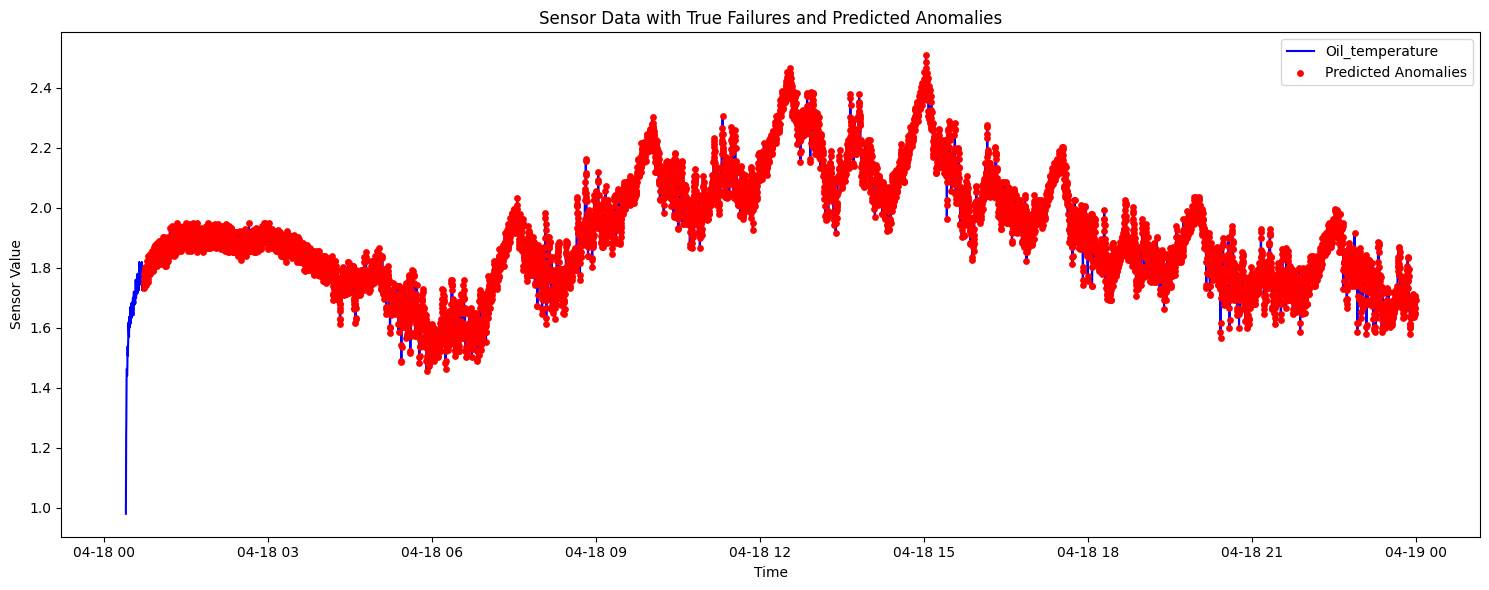

In [69]:
plot_and_compare(feature, failure_0_dataframe, predicted_dataframe)

In [70]:
failure_1_dataframe, predicted_dataframe = detected_and_test_dataframes(1)

In [71]:
predicted_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-05-29 23:30:08,-0.694362,7.089598,1.756281,1.587123,2.44662,0.277302,0.094073,0.332913
2020-05-29 23:30:18,-0.707036,7.675115,1.760242,1.666461,2.44662,0.277302,0.094073,0.332913
2020-05-29 23:30:27,-0.688025,7.675115,1.756281,1.700621,2.44662,0.277302,0.094073,0.332913
2020-05-29 23:30:37,-0.672183,7.675115,1.724593,1.675277,2.44662,0.277302,0.094073,0.332913
2020-05-29 23:30:47,-0.656340,7.689753,1.740437,1.643321,2.44662,0.277302,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-05-30 05:30:21,-1.004869,7.418951,2.223677,1.616875,2.44662,-3.606179,0.094073,0.332913
2020-05-30 05:30:30,-0.998532,7.426270,2.195950,1.571696,2.44662,-3.606179,0.094073,0.332913
2020-05-30 05:30:40,-0.989027,4.564554,2.223677,1.354617,2.44662,0.277302,0.094073,0.332913


In [72]:
failure_1_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-05-29 23:30:08,-0.694362,7.089598,1.756281,1.587123,2.446620,0.277302,0.094073,0.332913
2020-05-29 23:30:18,-0.707036,7.675115,1.760242,1.666461,2.446620,0.277302,0.094073,0.332913
2020-05-29 23:30:27,-0.688025,7.675115,1.756281,1.700621,2.446620,0.277302,0.094073,0.332913
2020-05-29 23:30:37,-0.672183,7.675115,1.724593,1.675277,2.446620,0.277302,0.094073,0.332913
2020-05-29 23:30:47,-0.656340,7.689753,1.740437,1.643321,2.446620,0.277302,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-05-30 05:59:15,1.216207,-0.112266,1.736476,0.829000,-0.408727,0.277302,0.094073,0.332913
2020-05-30 05:59:25,1.187691,-0.104947,1.708749,0.840019,-0.408727,0.277302,0.094073,0.332913
2020-05-30 05:59:35,1.156007,-0.104947,1.649334,0.823490,-0.408727,0.277302,0.094073,0.332913


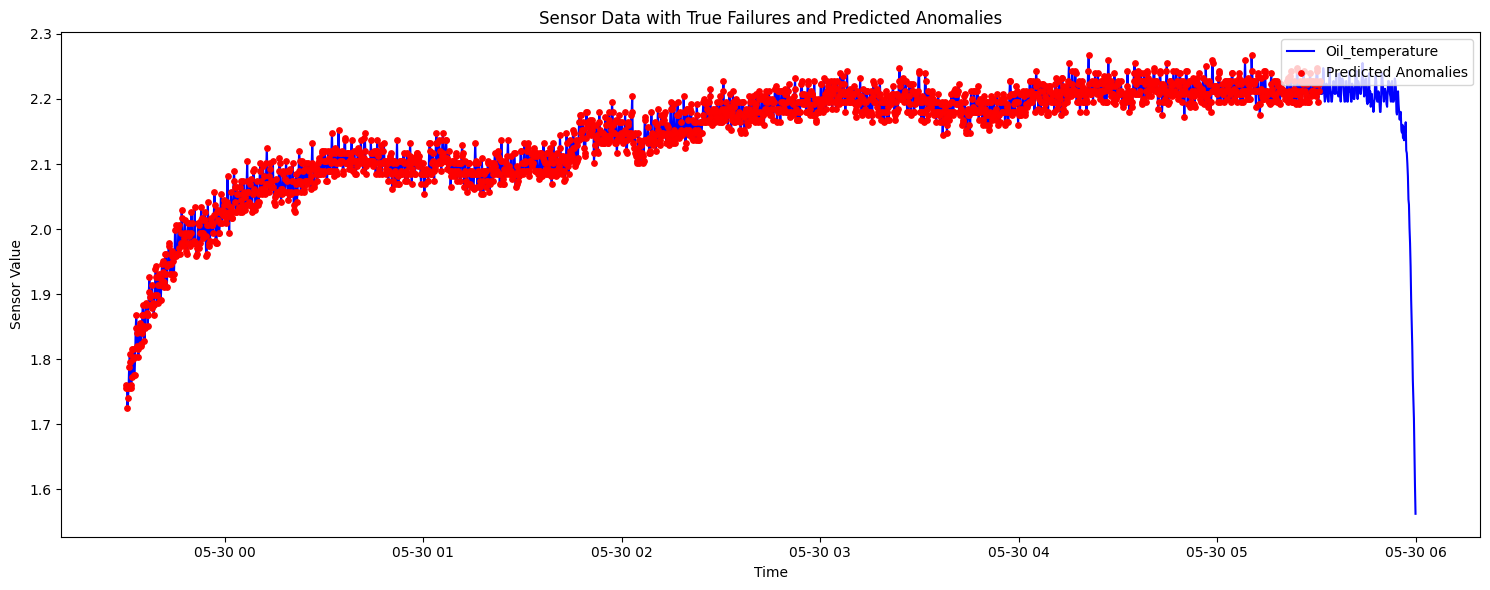

In [73]:
plot_and_compare(feature,failure_1_dataframe, predicted_dataframe)

In [74]:
failure_2_dataframe, predicted_dataframe = detected_and_test_dataframes(2)

In [75]:
failure_2_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-06-05 10:00:04,-0.900310,8.458244,1.839461,1.608059,2.44662,0.277302,0.094073,0.332913
2020-06-05 10:00:14,-0.900310,8.458244,1.803813,1.645525,2.44662,0.277302,0.094073,0.332913
2020-06-05 10:00:24,-0.890805,8.465564,1.823617,1.670869,2.44662,0.277302,0.094073,0.332913
2020-06-05 10:00:34,-0.887637,4.871951,1.847383,1.364534,2.44662,-3.606179,0.094073,0.332913
2020-06-05 10:00:44,-0.906647,7.272572,1.875110,1.532027,2.44662,-3.606179,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-06-07 14:19:00,-1.654399,6.877347,2.049393,1.551861,2.44662,0.277302,0.094073,0.332913
2020-06-07 14:19:10,-1.644894,7.089598,2.057315,1.613569,2.44662,0.277302,0.094073,0.332913
2020-06-07 14:19:20,-1.625883,7.111555,2.037511,1.560677,2.44662,0.277302,0.094073,0.332913


In [76]:
predicted_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-06-05 10:00:04,-0.900310,8.458244,1.839461,1.608059,2.44662,0.277302,0.094073,0.332913
2020-06-05 10:00:14,-0.900310,8.458244,1.803813,1.645525,2.44662,0.277302,0.094073,0.332913
2020-06-05 10:00:24,-0.890805,8.465564,1.823617,1.670869,2.44662,0.277302,0.094073,0.332913
2020-06-05 10:00:34,-0.887637,4.871951,1.847383,1.364534,2.44662,-3.606179,0.094073,0.332913
2020-06-05 10:00:44,-0.906647,7.272572,1.875110,1.532027,2.44662,-3.606179,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-06-07 13:17:33,-1.610041,7.074960,2.045433,1.614671,2.44662,-3.606179,0.094073,0.332913
2020-06-07 13:17:43,-1.603704,5.252537,2.057315,1.458198,2.44662,0.277302,-10.630083,0.332913
2020-06-07 13:17:53,-1.638557,6.504080,2.081081,1.516600,2.44662,0.277302,0.094073,0.332913


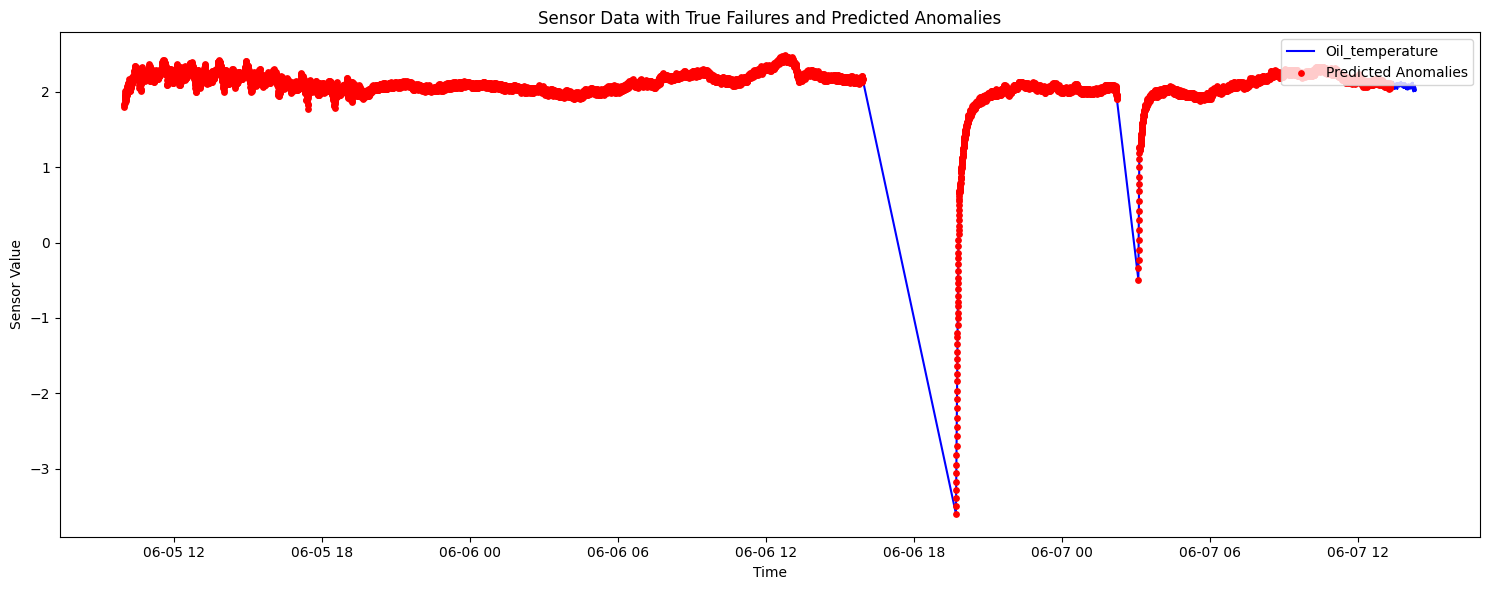

In [77]:
plot_and_compare(feature,failure_2_dataframe, predicted_dataframe)

In [78]:
failure_3_dataframe, predicted_dataframe = detected_and_test_dataframes(3)

In [79]:
failure_3_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-07-15 14:30:00,0.975406,-0.097628,3.091132,1.748003,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:10,1.026101,-0.104947,3.095093,1.710538,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:20,1.076796,-0.104947,3.130742,1.782163,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:30,1.133828,-0.104947,3.146586,1.721557,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:40,1.083133,-0.097628,3.158469,1.787673,2.446620,0.277302,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-07-15 18:59:20,-0.241275,-0.097628,1.791930,0.698973,-0.408727,0.277302,0.094073,0.332913
2020-07-15 18:59:30,-0.288801,-0.104947,1.784008,0.697871,-0.408727,0.277302,0.094073,0.332913
2020-07-15 18:59:40,-0.339497,-0.097628,1.768164,0.730929,-0.408727,0.277302,0.094073,0.332913


In [80]:
predicted_dataframe

,TP3,DV_pressure,Oil_temperature,Motor_current,DV_eletric,Towers,Pressure_switch,Oil_level
timestamp,,,,,,,,
2020-07-15 14:30:00,0.975406,-0.097628,3.091132,1.748003,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:10,1.026101,-0.104947,3.095093,1.710538,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:20,1.076796,-0.104947,3.130742,1.782163,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:30,1.133828,-0.104947,3.146586,1.721557,2.446620,-3.606179,0.094073,0.332913
2020-07-15 14:30:40,1.083133,-0.097628,3.158469,1.787673,2.446620,0.277302,0.094073,0.332913
...,...,...,...,...,...,...,...,...
2020-07-15 18:59:20,-0.241275,-0.097628,1.791930,0.698973,-0.408727,0.277302,0.094073,0.332913
2020-07-15 18:59:30,-0.288801,-0.104947,1.784008,0.697871,-0.408727,0.277302,0.094073,0.332913
2020-07-15 18:59:40,-0.339497,-0.097628,1.768164,0.730929,-0.408727,0.277302,0.094073,0.332913


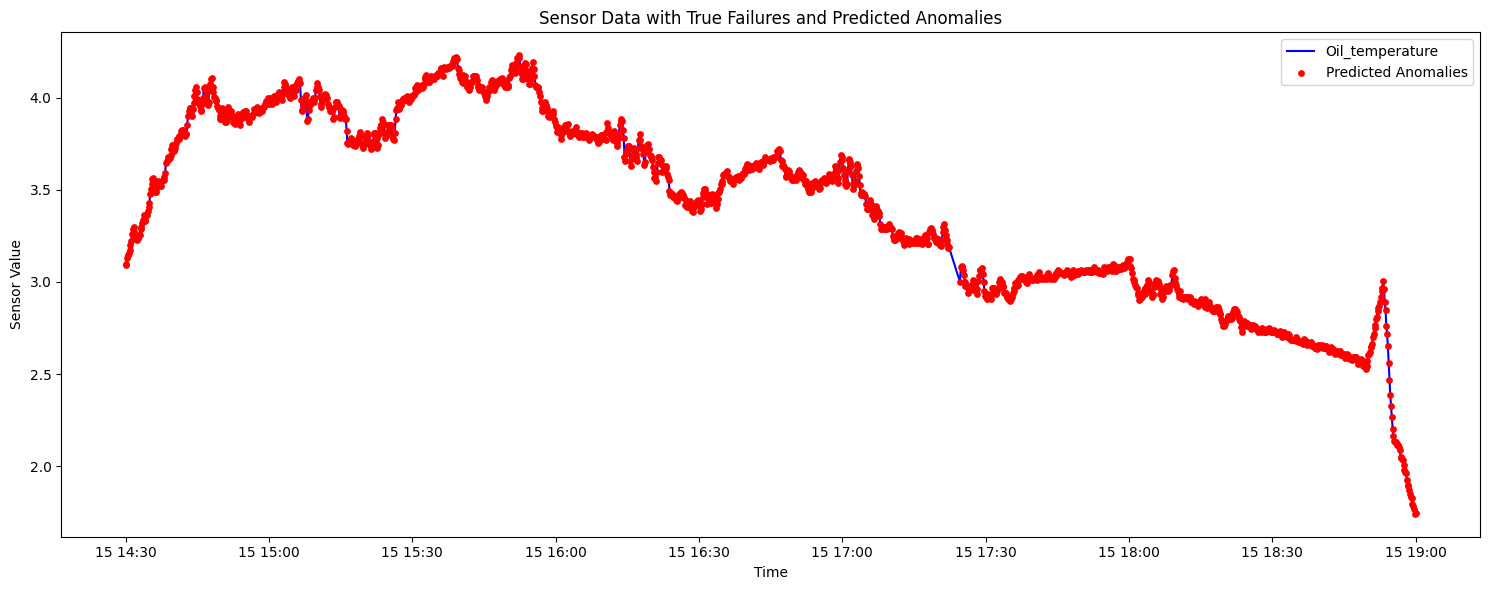

In [81]:
plot_and_compare(feature,failure_3_dataframe, predicted_dataframe)

In [83]:
keras.saving.save_model(model,"autoencoder.keras")

In [86]:
autoencoder = keras.saving.load_model("autoencoder.keras", compile=False)